In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Merge all 12 months sales data

# create an empty data frame 
all_data_files = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_data_files = pd.concat([all_data_files, df])
    
all_data_files.to_csv('all_data.csv')

In [3]:
data = pd.read_csv('./Output/all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# clean data - remove NaN

nan_df = data[data.isna().any(axis=1)]
nan_df.head()

# drop NaN rows
data = data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# remove 'Or' 
data = data[data['Order Date'].str[:2] != 'Or']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# add month column to the data frame

data['Month'] = data['Order Date'].str[:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Q1: what was the best month for sales and the sale value?

In [7]:
# convert Quantity ordered and Price each to numeric

data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

# add a sales column

data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [8]:
# groupby on Month

result = data.groupby('Month').sum()['Sales']

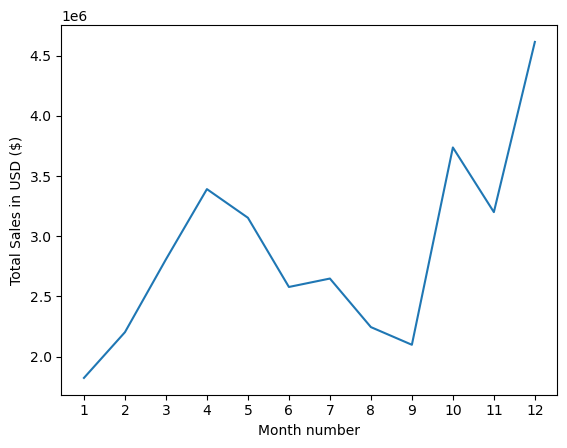

In [9]:
months = range(1, 13)
plt.plot(months, result)
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Total Sales in USD ($)');

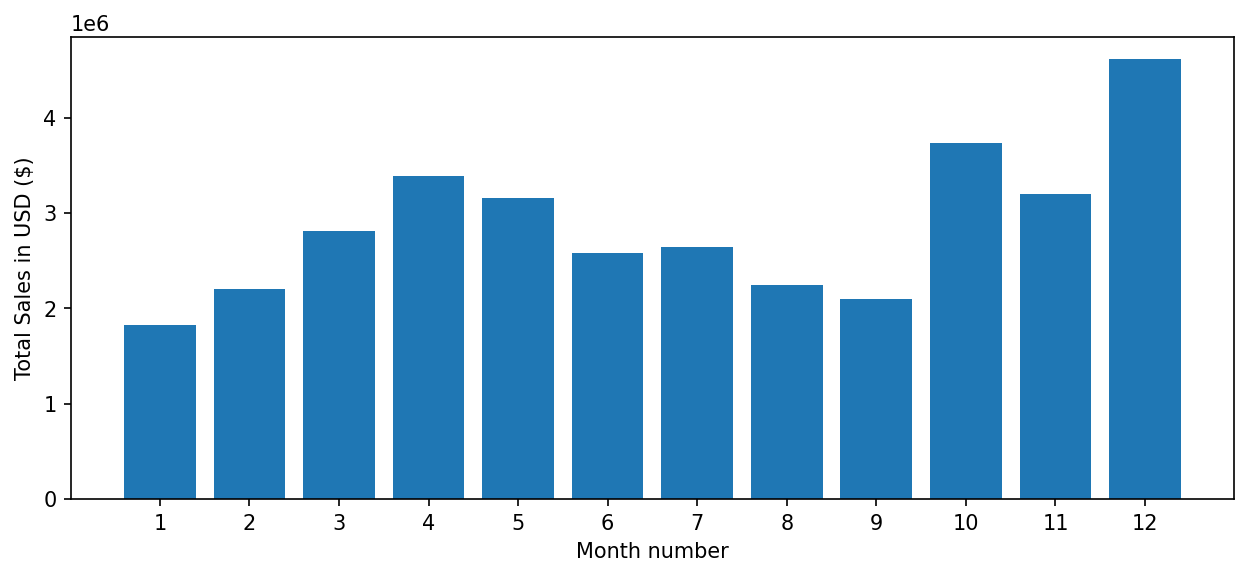

In [10]:
plt.figure(figsize=(10, 4), dpi=150)
plt.bar(months, result)
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Total Sales in USD ($)');

#### Q2: What city has the highest number of sales?

In [11]:
# create city and state columns

def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [12]:
result = data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


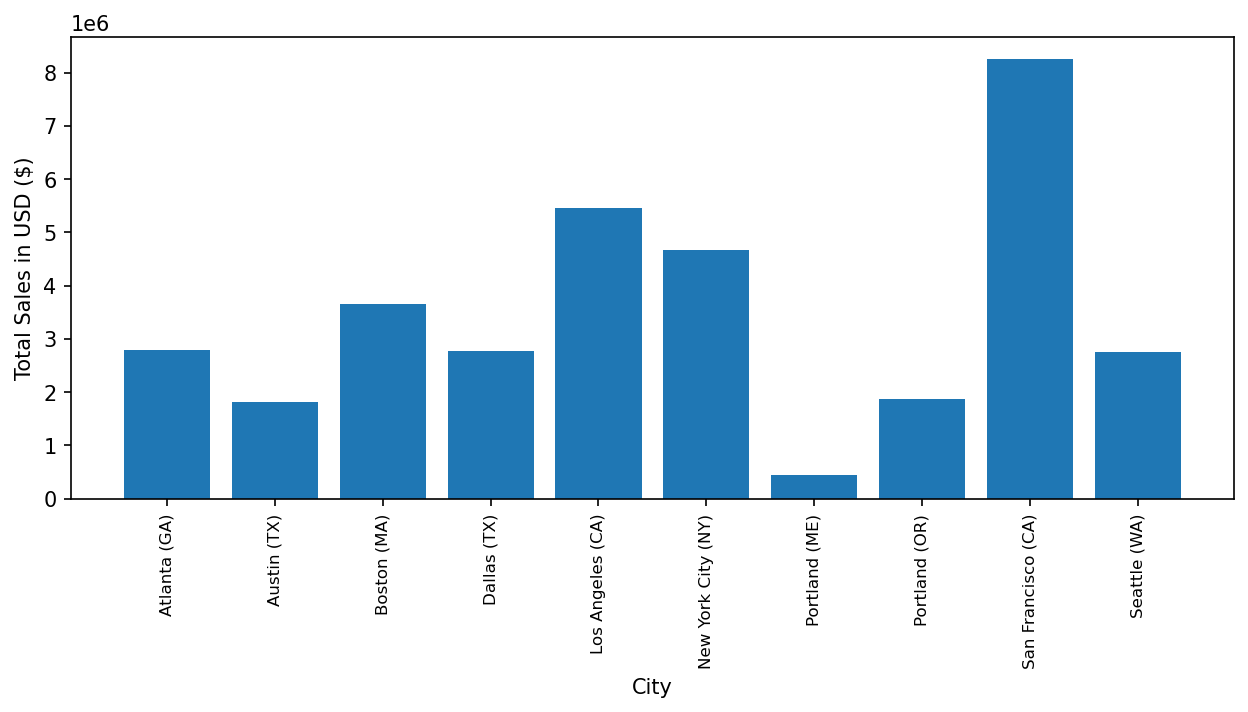

In [13]:
cities = [city for city, df in data.groupby('City')]

plt.figure(figsize=(10, 4), dpi=150)
plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City')
plt.ylabel('Total Sales in USD ($)');

#### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [15]:
# converting order date to datetime object

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [17]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


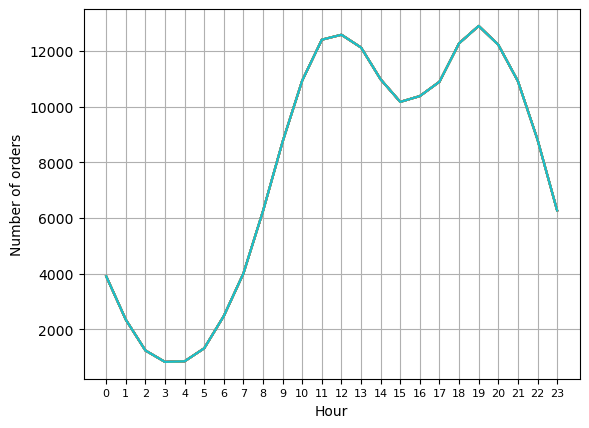

In [21]:
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour').count())
plt.xticks(hours, size=8)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid();

#### Q4: What products are most often sold together?

In [22]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [29]:
df = data[data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [30]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/var/folders/qd/vxdsct4d52x92x24dq76zf_c0000gn/T/ipykernel_44321/759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [31]:
# drop duplicate orders

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5: What product sold the most? 

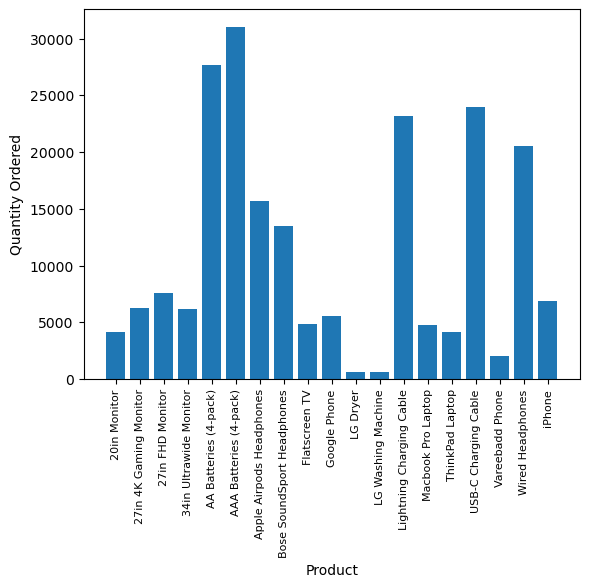

In [35]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show();

/var/folders/qd/vxdsct4d52x92x24dq76zf_c0000gn/T/ipykernel_44321/3499159340.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/var/folders/qd/vxdsct4d52x92x24dq76zf_c0000gn/T/ipykernel_44321/3499159340.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


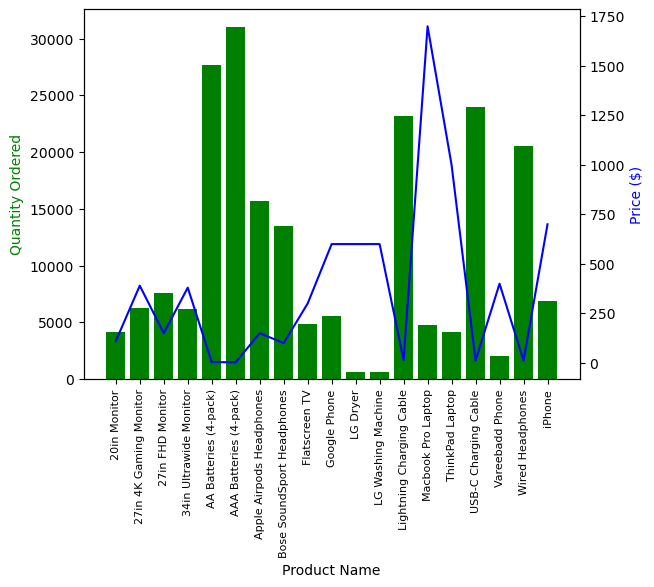

In [37]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()